# Fake News classification using LSTM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('WELFake_Dataset.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [3]:
df.head(10)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1
7,7,HOUSE INTEL CHAIR On Trump-Russia Fake Story: ...,,1
8,8,Sports Bar Owner Bans NFL Games…Will Show Only...,"The owner of the Ringling Bar, located south o...",1
9,9,Latest Pipeline Leak Underscores Dangers Of Da...,"FILE – In this Sept. 15, 2005 file photo, the ...",1


In [4]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [5]:
df=df.dropna()

In [7]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_7232/1186154468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0'],inplace=True)


In [10]:
df

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


<Axes: ylabel='count'>

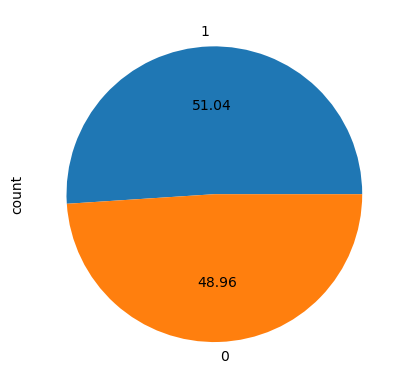

In [14]:
df['label'].value_counts().plot.pie(autopct='%.2f')

In [15]:
X=df.drop(columns=['label'])
y=df['label']

In [16]:
X.head()

,title,text
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will..."
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...


In [17]:
print(X.shape)
print(y.shape)

(71537, 2)
(71537,)


In [18]:
import tensorflow as tf

In [19]:
vocab_size=20000

In [20]:
messages=X.copy()

In [21]:
messages.reset_index(inplace=True)

In [23]:
messages['title'][2]

'Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid'

In [24]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\my
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
from nltk.stem.porter import PorterStemmer

In [26]:
stemmer=PorterStemmer()

In [27]:
corpus=[]

In [28]:
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review=review.lower()
    review=review.split()
    
    stemmed_review=[]
    for word in review:
        if word not in stopwords.words('english'):
            stemmed_word=stemmer.stem(word)
            stemmed_review.append(stemmed_word)
    review=' '.join(stemmed_review)
    corpus.append(review)
    

In [29]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout

In [31]:
onehot_repr=[]
for word in corpus:
    onehot_words=one_hot(word,vocab_size)
    onehot_repr.append(onehot_words)

In [32]:
onehot_repr[:10]

[[245, 2933, 13704, 6595, 8482, 7431, 13576, 9812, 136, 7207, 7773, 10838],
 [19006,
  1068,
  3505,
  12508,
  4869,
  11518,
  16527,
  12,
  13621,
  4682,
  8653,
  14626,
  19297,
  10838],
 [6004, 12387, 9671, 3231, 19159, 4293, 6338, 9037, 2438, 18183, 13935, 3346],
 [7448, 14491, 18745, 15366, 7403, 7638, 13623, 15334, 9732, 1111, 16649],
 [2066, 6338, 2500, 14697, 3255, 16485, 3412, 5535, 2500],
 [14541, 13051, 4593, 2632, 9817, 15750, 1303, 8019, 16917, 8031, 11961],
 [12562, 4458, 9605, 2059, 14491, 15685, 4293, 4196, 9997, 10838],
 [2813,
  5151,
  15582,
  16764,
  5290,
  8563,
  10365,
  15413,
  15003,
  2813,
  17362,
  16139,
  9394,
  13484,
  10838],
 [5408, 16156, 18469, 4179, 7243, 3186, 1449, 16156],
 [3277, 4363, 17500, 13114, 7843, 17621, 10196, 5919]]

# Embedding

In [33]:
sentence_length=60
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sentence_length)
print(embedded_docs)

[[    0     0     0 ...  7207  7773 10838]
 [    0     0     0 ... 14626 19297 10838]
 [    0     0     0 ... 18183 13935  3346]
 ...
 [    0     0     0 ... 16047  4194    78]
 [    0     0     0 ...  7324 18221  4669]
 [    0     0     0 ... 13784  2626 15084]]


# LSTM

In [35]:
embedding_vector_features=100 

model=Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=sentence_length))
model.add(LSTM(100)) 
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           2000000   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 2,080,501
Trainable params: 2,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
X_final = np.array(embedded_docs)
y_final = np.array(y)
X_final.shape,y_final.shape

((71537, 60), (71537,))

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [38]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1789/1789 [==============================] - 24s 6ms/step - loss: 0.2697 - accuracy: 0.8861 - val_loss: 0.2215 - val_accuracy: 0.9098
Epoch 2/10
1789/1789 [==============================] - 11s 6ms/step - loss: 0.1759 - accuracy: 0.9300 - val_loss: 0.2327 - val_accuracy: 0.9075
Epoch 3/10
1789/1789 [==============================] - 11s 6ms/step - loss: 0.1302 - accuracy: 0.9479 - val_loss: 0.2563 - val_accuracy: 0.9066
Epoch 4/10
1789/1789 [==============================] - 11s 6ms/step - loss: 0.0960 - accuracy: 0.9622 - val_loss: 0.2676 - val_accuracy: 0.9086
Epoch 5/10
1789/1789 [==============================] - 11s 6ms/step - loss: 0.0705 - accuracy: 0.9720 - val_loss: 0.3158 - val_accuracy: 0.9073
Epoch 6/10
1789/1789 [==============================] - 11s 6ms/step - loss: 0.0496 - accuracy: 0.9809 - val_loss: 0.3744 - val_accuracy: 0.9072
Epoch 7/10
1789/1789 [==============================] - 11s 6ms/step - loss: 0.0367 - accuracy: 0.9860 - val_loss: 0.4327 - val_ac

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_log = model.predict(X_test)
y_pred = np.where(y_log>0.5,1,0)

acc = accuracy_score(y_test, y_pred)

confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[6322  759]
 [ 582 6645]]


In [40]:
print(acc)

0.9062762091137825
